In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
!yolo mode=checks

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dw5Z2Wj2wCXF5GCSb7qX")
project = rf.workspace("roboflow-100").project("aquarium-qlnqy")
dataset = project.version(2).download("yolov8")

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 149MB/s]
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/aquarium-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

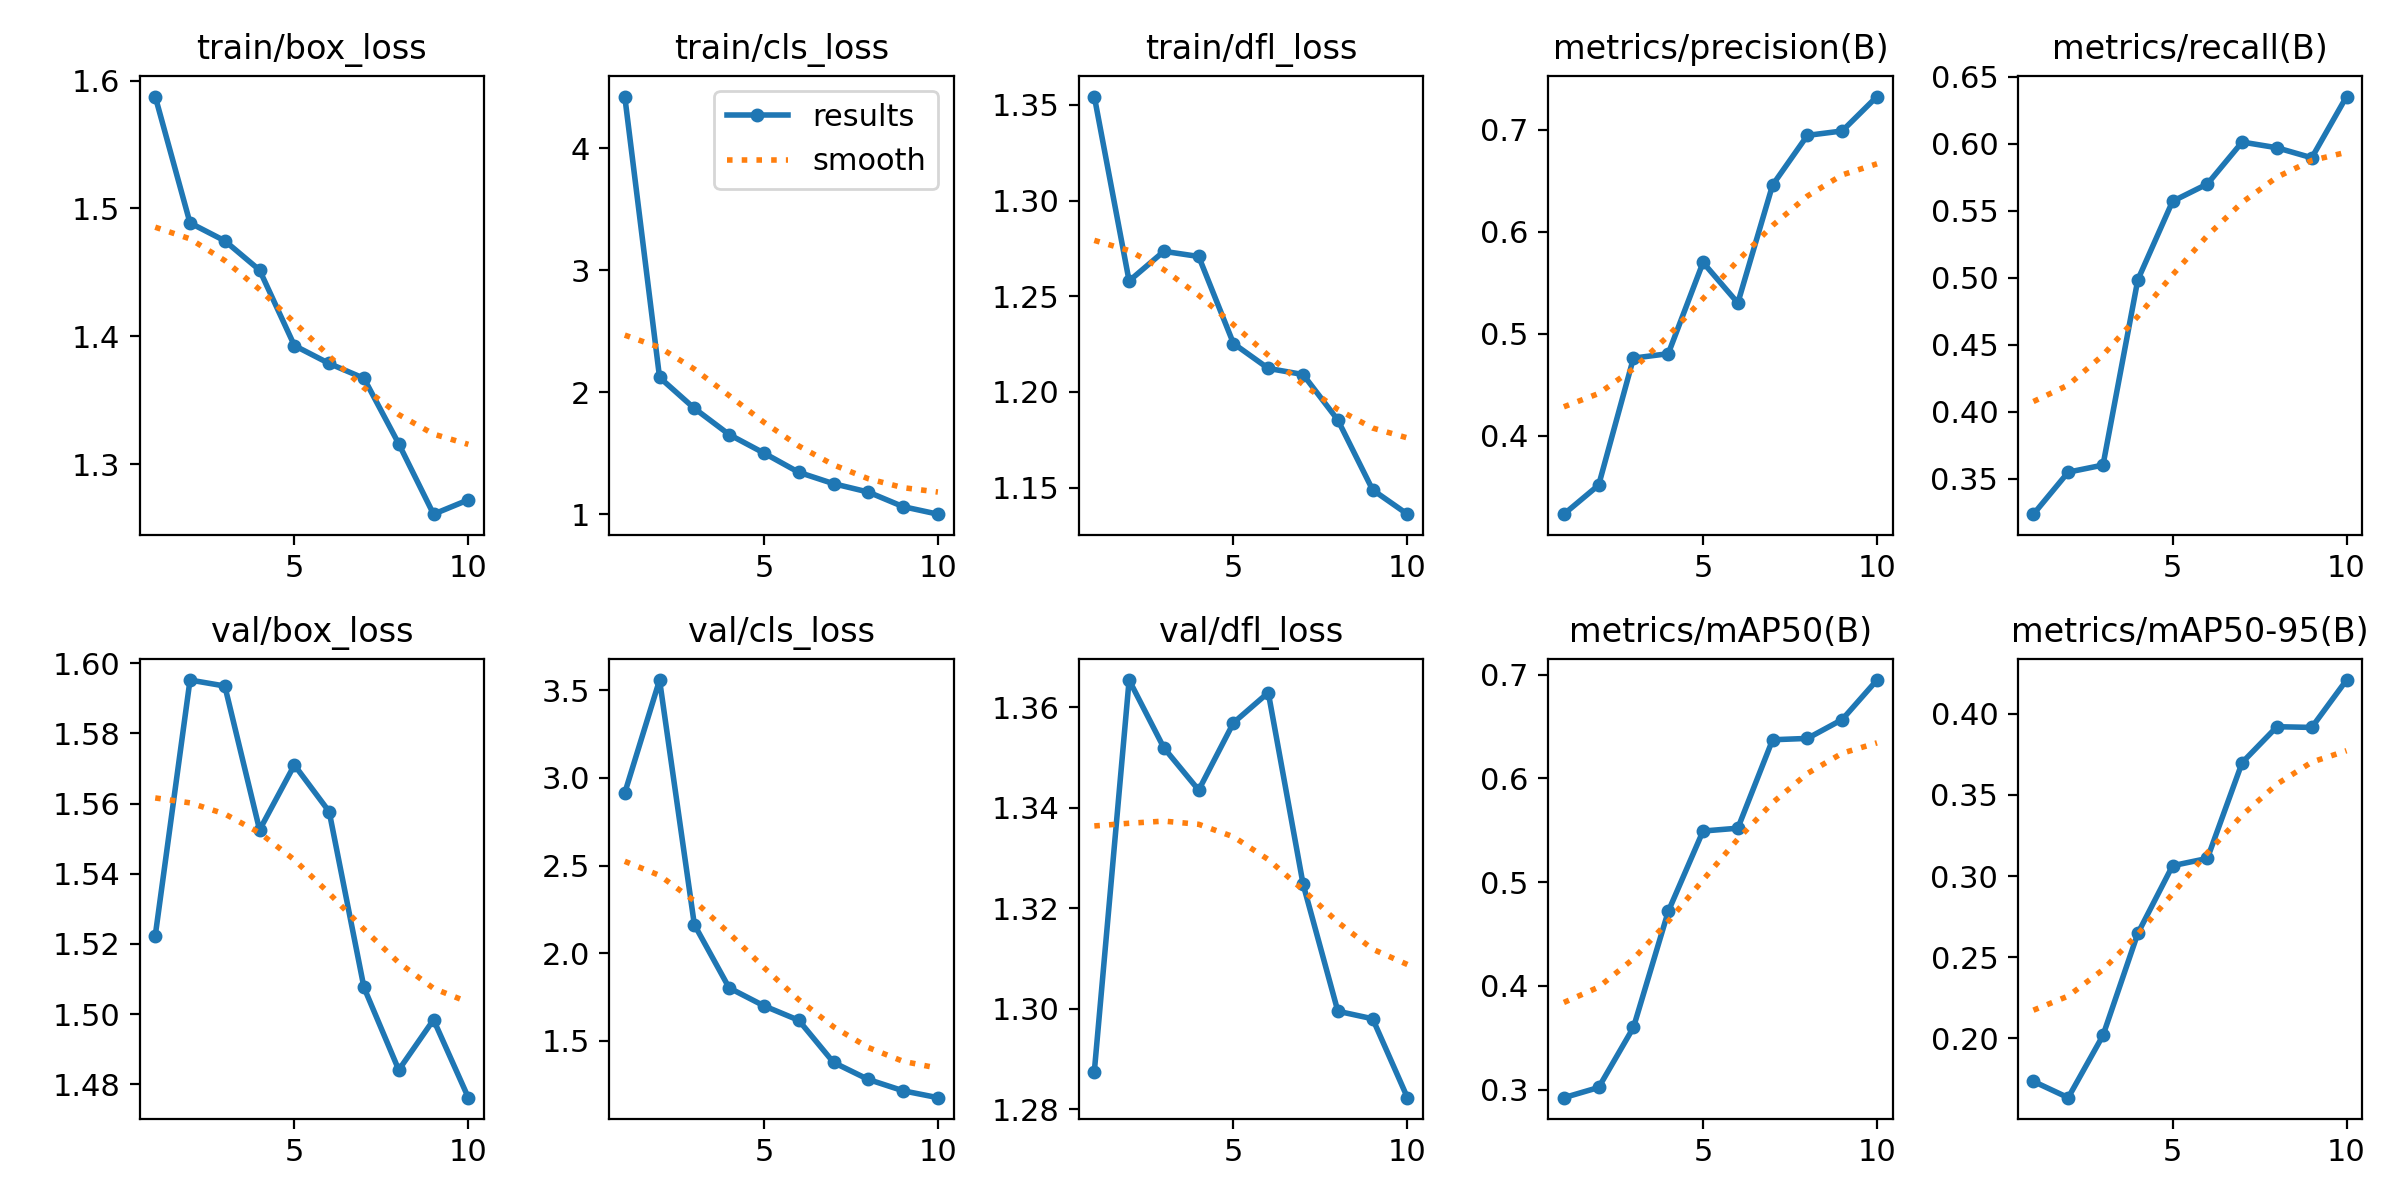

In [ ]:
Image(filename='/content/runs/detect/train/results.png')

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/aquarium-2/test/images

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/63 /content/aquarium-2/test/images/IMG_2289_jpeg_jpg.rf.e512a8d7e72d4a33c5667d2a0685ef7f.jpg: 640x480 1 penguin, 191.7ms
image 2/63 /content/aquarium-2/test/images/IMG_2301_jpeg_jpg.rf.822c0a62daa53448f5e66fadb2b15b85.jpg: 640x480 23 penguins, 12.2ms
image 3/63 /content/aquarium-2/test/images/IMG_2319_jpeg_jpg.rf.69bba80dec0a0d4866c4037b3a12dcff.jpg: 640x480 11 penguins, 12.2ms
image 4/63 /content/aquarium-2/test/images/IMG_2347_jpeg_jpg.rf.cc26b11c425d65a90061fabb993cabab.jpg: 640x480 1 penguin, 12.2ms
image 5/63 /content/aquarium-2/test/images/IMG_2354_jpeg_jpg.rf.061ebc33c1afd6cc462598f74cfa4da0.jpg: 640x480 1 fish, 4 penguins, 12.1ms
image 6/63 /content/aquarium-2/test/images/IMG_2371_jpeg_jpg.rf.12162e15de98f7727a6eb73959ccadbf.jpg: 640x480 2 fishs, 1 shark, 12.1ms

In [17]:
import matplotlib.pyplot as plt

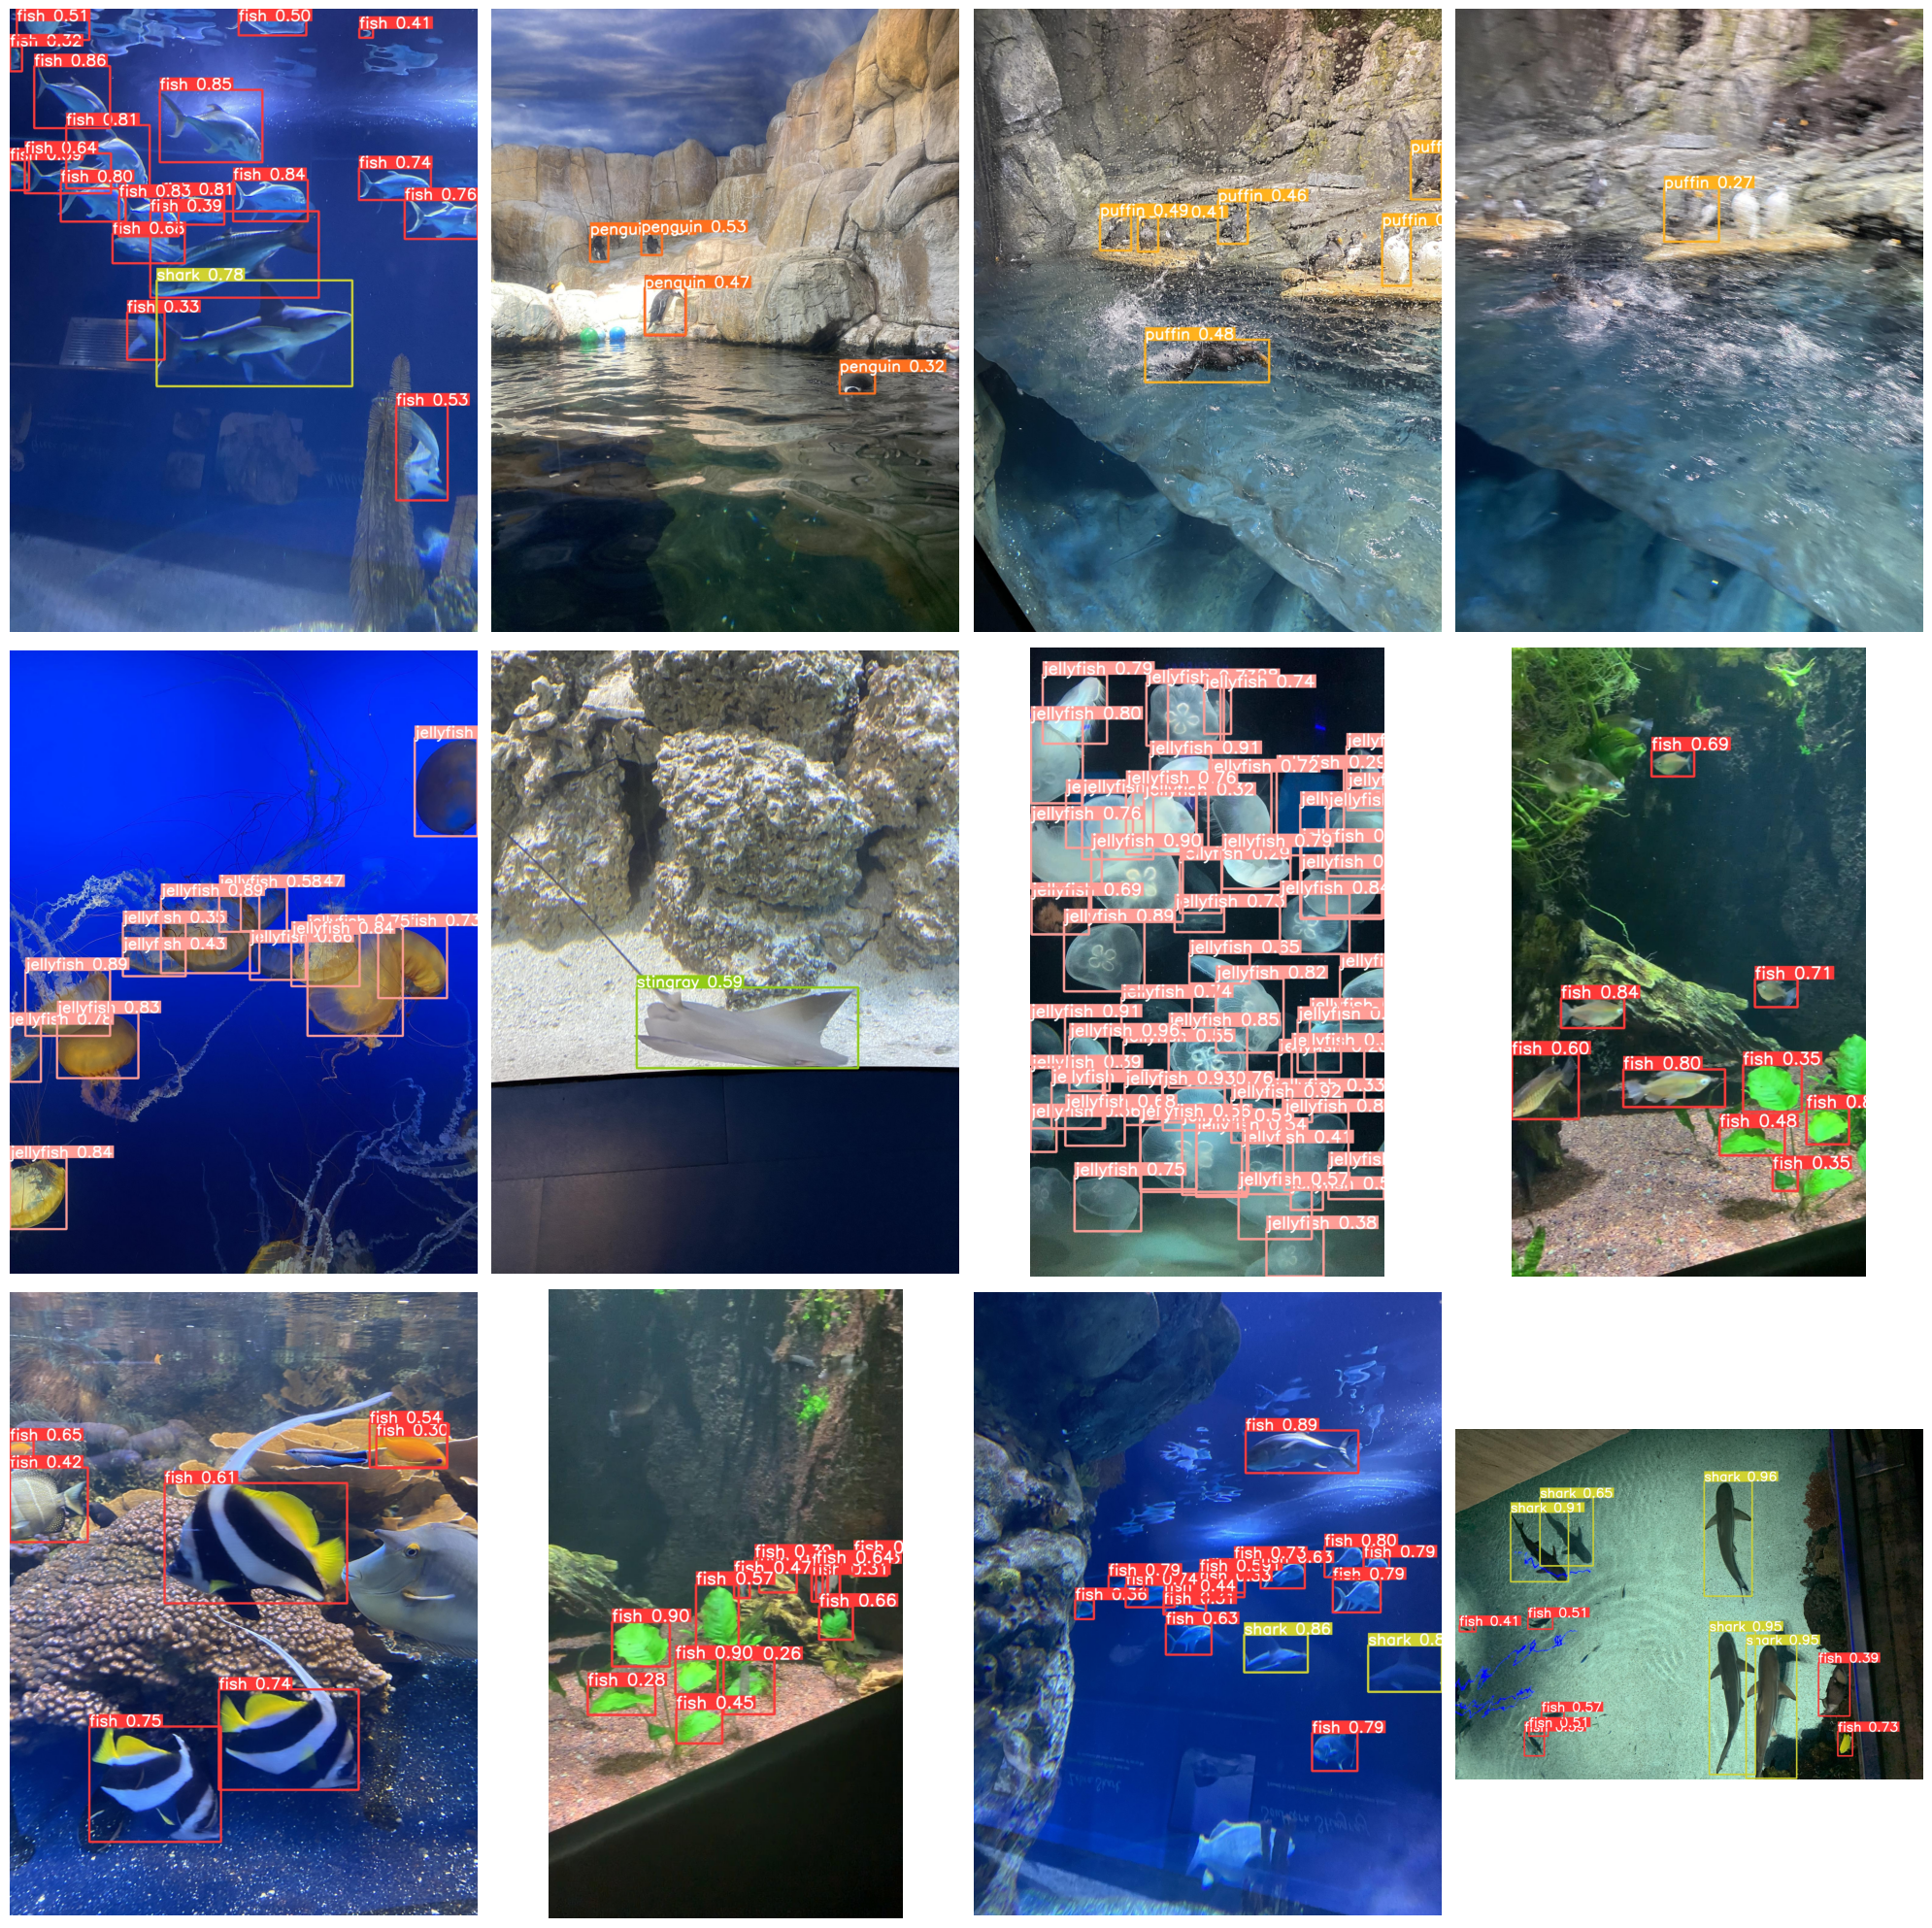

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 20))

image_files = os.listdir('/content/runs/detect/predict')

for i, ax in enumerate(axes.flat):
    image = plt.imread(f'/content/runs/detect/predict/{image_files[i]}')
    ax.imshow(image)
    ax.axis('off')

plt.tight_layout()
plt.show()